In [239]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import numpy as np

In [283]:
pd.set_option('display.max_rows', 12)

### Check the count points with data between 2019-2022

In [12]:
#raw_counts = pd.read_csv('C:/Users/2672496L/OneDrive - University of Glasgow/UofG/Data/Data processing/Traffic data/Traffic_counts-department_for_transport/dft_rawcount_local_authority_id_3.csv')
raw_counts = pd.read_csv('Traffic_counts-department_for_transport/dft_rawcount_local_authority_id_3.csv')
display(raw_counts.sort_values(by=['count_point_id','count_date', 'hour'])[['count_point_id','direction_of_travel','year','count_date','hour','road_name','easting','northing','latitude','longitude','pedal_cycles','two_wheeled_motor_vehicles','cars_and_taxis','buses_and_coaches','all_motor_vehicles']].loc[raw_counts.count_date>'2019-09-30'].loc[raw_counts.count_point_id == 1011])

,count_point_id,direction_of_travel,year,count_date,hour,road_name,easting,northing,latitude,longitude,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,all_motor_vehicles
15868,1011,S,2019,2019-10-04,7,A8,259560,664750,55.855427,-4.245153,3,4,274,1,341
15871,1011,N,2019,2019-10-04,7,A8,259560,664750,55.855427,-4.245153,11,1,273,24,357
15872,1011,S,2019,2019-10-04,8,A8,259560,664750,55.855427,-4.245153,6,3,403,0,480
15874,1011,N,2019,2019-10-04,8,A8,259560,664750,55.855427,-4.245153,24,3,471,6,555
15869,1011,S,2019,2019-10-04,9,A8,259560,664750,55.855427,-4.245153,6,2,397,3,495
15877,1011,N,2019,2019-10-04,9,A8,259560,664750,55.855427,-4.245153,12,1,424,3,528
15864,1011,N,2019,2019-10-04,10,A8,259560,664750,55.855427,-4.245153,5,3,336,3,442
15882,1011,S,2019,2019-10-04,10,A8,259560,664750,55.855427,-4.245153,3,1,255,6,352
15878,1011,N,2019,2019-10-04,11,A8,259560,664750,55.855427,-4.245153,9,0,377,2,473
15883,1011,S,2019,2019-10-04,11,A8,259560,664750,55.855427,-4.245153,7,4,301,3,398


In [23]:
point_1_2019 = raw_counts.loc[raw_counts.count_date>'2019-09-30'].loc[raw_counts.count_point_id == 811435].sort_values(by=['count_point_id','count_date', 'hour'])[['count_point_id','direction_of_travel','year','count_date','hour','road_name','easting','northing','latitude','longitude','pedal_cycles','two_wheeled_motor_vehicles','cars_and_taxis','buses_and_coaches','all_motor_vehicles']]
print(point_1_2019.count_date.unique())
point_1_2019

['2019-10-08']


,count_point_id,direction_of_travel,year,count_date,hour,road_name,easting,northing,latitude,longitude,pedal_cycles,two_wheeled_motor_vehicles,cars_and_taxis,buses_and_coaches,all_motor_vehicles
16224,811435,W,2019,2019-10-08,7,C,259909,664526,55.853517,-4.239466,0,0,167,0,213
16232,811435,W,2019,2019-10-08,8,C,259909,664526,55.853517,-4.239466,0,3,336,0,385
16234,811435,W,2019,2019-10-08,9,C,259909,664526,55.853517,-4.239466,1,0,135,1,175
16229,811435,W,2019,2019-10-08,10,C,259909,664526,55.853517,-4.239466,0,0,71,8,113
16228,811435,W,2019,2019-10-08,11,C,259909,664526,55.853517,-4.239466,1,0,81,4,117
16225,811435,W,2019,2019-10-08,12,C,259909,664526,55.853517,-4.239466,0,0,76,5,109
16227,811435,W,2019,2019-10-08,13,C,259909,664526,55.853517,-4.239466,3,1,95,6,135
16233,811435,W,2019,2019-10-08,14,C,259909,664526,55.853517,-4.239466,0,1,82,3,133
16235,811435,W,2019,2019-10-08,15,C,259909,664526,55.853517,-4.239466,1,0,131,6,173
16230,811435,W,2019,2019-10-08,16,C,259909,664526,55.853517,-4.239466,1,1,293,3,338


In [16]:
useful_dates = raw_counts.loc[raw_counts.count_date>'2019-09-30', 'count_date'].unique()
useful_dates.sort()
print(useful_dates)

['2019-10-01' '2019-10-02' '2019-10-04' '2019-10-07' '2019-10-08'
 '2019-10-10' '2020-06-05' '2020-06-08' '2020-06-11' '2020-09-02'
 '2020-09-07' '2020-09-10' '2020-09-14' '2020-09-16' '2020-09-17'
 '2020-09-18' '2020-09-21' '2020-09-24' '2020-09-30' '2020-10-05'
 '2020-10-08' '2021-03-22' '2021-04-29' '2021-04-30' '2021-05-14'
 '2021-05-20' '2021-05-21' '2021-05-24' '2021-06-07' '2021-06-09'
 '2021-06-10' '2021-09-06' '2021-09-13' '2021-09-17' '2021-10-04'
 '2021-10-05' '2021-10-19' '2022-03-25' '2022-03-31' '2022-04-21'
 '2022-04-27' '2022-05-09' '2022-05-10' '2022-05-11' '2022-05-13'
 '2022-05-16' '2022-06-06' '2022-06-08' '2022-06-13' '2022-06-14'
 '2022-06-15' '2022-06-16' '2022-06-17' '2022-09-06' '2022-09-07'
 '2022-09-08' '2022-09-09' '2022-09-12' '2022-09-13' '2022-09-21'
 '2022-10-07']


In [49]:
sorted(raw_counts.loc[raw_counts.count_point_id == 811435, 'hour'].unique())

[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]

In [61]:
data_sum = []
for count_point in set(raw_counts.count_point_id):
    useful_data = raw_counts.loc[raw_counts.count_date>'2019-09-30'].loc[raw_counts.count_point_id == count_point]
    data_date = sorted(useful_data.count_date.unique())
    data_len = len(useful_data)
    time = sorted(raw_counts.loc[raw_counts.count_point_id == count_point, 'hour'].unique())
    lat = raw_counts.loc[raw_counts.count_point_id == count_point, 'latitude'].unique()[0]
    lon = raw_counts.loc[raw_counts.count_point_id == count_point, 'longitude'].unique()[0]
    data_sum.append([count_point, data_len, data_date, time, lat, lon])

data_df = pd.DataFrame(data_sum, columns=['count_point_id', 'data_len', 'date', 'time', 'latitude', 'longitude'])     
useful_data = data_df.sort_values(by=['data_len']).loc[data_df.data_len > 0].reset_index(drop=True)
display(useful_data)
#useful_data.to_csv('Traffic_counts-department_for_transport/useful_counts_68.csv',index=False)

useful_data['data_len'].value_counts().to_frame()

,count_point_id,data_len,date,time,latitude,longitude
0,811435,12,[2019-10-08],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.853517,-4.239466
1,93216,12,[2022-05-11],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.850608,-4.268232
2,80443,12,[2021-10-05],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.861945,-4.267167
3,80442,12,[2022-09-07],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.859357,-4.270995
4,93220,12,[2022-06-16],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.850094,-4.279977
...,...,...,...,...,...,...
63,811253,48,"[2019-10-10, 2020-10-08]","[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.851096,-4.171491
64,80446,48,"[2020-09-02, 2022-10-07]","[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.854702,-4.270037
65,82039,48,"[2020-09-17, 2022-05-09]","[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.849756,-4.286587
66,804654,72,"[2020-09-07, 2021-09-06, 2022-09-12]","[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.870907,-4.221142


,count
data_len,
24,32
12,22
48,12
72,2


In [29]:
for i in useful_data.date[0]:
    print(i)

2019-10-08


### Create shapefile of 68 points

In [78]:
from shapely.geometry import Point

useful_data['geometry'] = useful_data.apply(lambda x: Point((float(x.longitude), float(x.latitude))), axis=1)
useful_data_geo = gpd.GeoDataFrame(useful_data, crs="epsg:4326", geometry='geometry')

data_to_shp = useful_data_geo[['count_point_id', 'latitude', 'longitude','geometry']]
#data_to_shp.to_file('Traffic_counts-department_for_transport/useful_counts_68.shp', driver='ESRI Shapefile')

### Plot 68 useful count point and 470 sensors on map

In [32]:
import folium
import matplotlib
import mapclassify

#### Create geodataframe

In [205]:
countpoint_68 = pd.read_csv('Traffic_counts-department_for_transport/useful_counts_68.csv')
# Create a GeoDataFrame
countpoint_68["geometry"] = gpd.points_from_xy(countpoint_68["longitude"], countpoint_68["latitude"])
# set coordinates to WGS84
countpoint_68 = gpd.GeoDataFrame(countpoint_68, crs="epsg:4326")


detector_470 = pd.read_csv('SCOOT/detector_470.csv')
# Create a GeoDataFrame
detector_470["geometry"] = gpd.points_from_xy(detector_470["lon"], detector_470["lat"])
# set coordinates to WGS84
detector_470 = gpd.GeoDataFrame(detector_470, crs="epsg:4326")

#### Get the nearest distance between coutpoint and sensors

In [206]:
countpoint_68 = countpoint_68.to_crs("32630")
detector_470 = detector_470.to_crs("32630")

In [235]:
countpoint_dis = gpd.sjoin_nearest(countpoint_68, detector_470, distance_col="distances", lsuffix="left", rsuffix="right", exclusive=True)
countpoint_dis[['count_point_id','siteId','data_len','date','distances']].sort_values(by=['distances']).reset_index(drop=True)

,count_point_id,siteId,data_len,date,distances
0,811300,GC1351_A,24,['2020-09-24'],11.225234
1,50978,GL1821_R,24,['2021-09-17'],15.264995
2,80444,GA0601_V,12,['2021-10-04'],29.426229
3,82083,GB0121_B,12,['2019-10-01'],56.935227
4,1011,GA5151_V,24,['2019-10-04'],66.200866
5,93216,GL0051_S,12,['2022-05-11'],90.907180
6,80443,GA0401_S,12,['2021-10-05'],96.682860
7,80446,GL0451_B,48,"['2020-09-02', '2022-10-07']",104.893150
8,40924,GC180A_A,48,"['2020-09-16', '2022-06-14']",108.491388
9,93098,GH335A_R,24,['2021-10-19'],111.160584


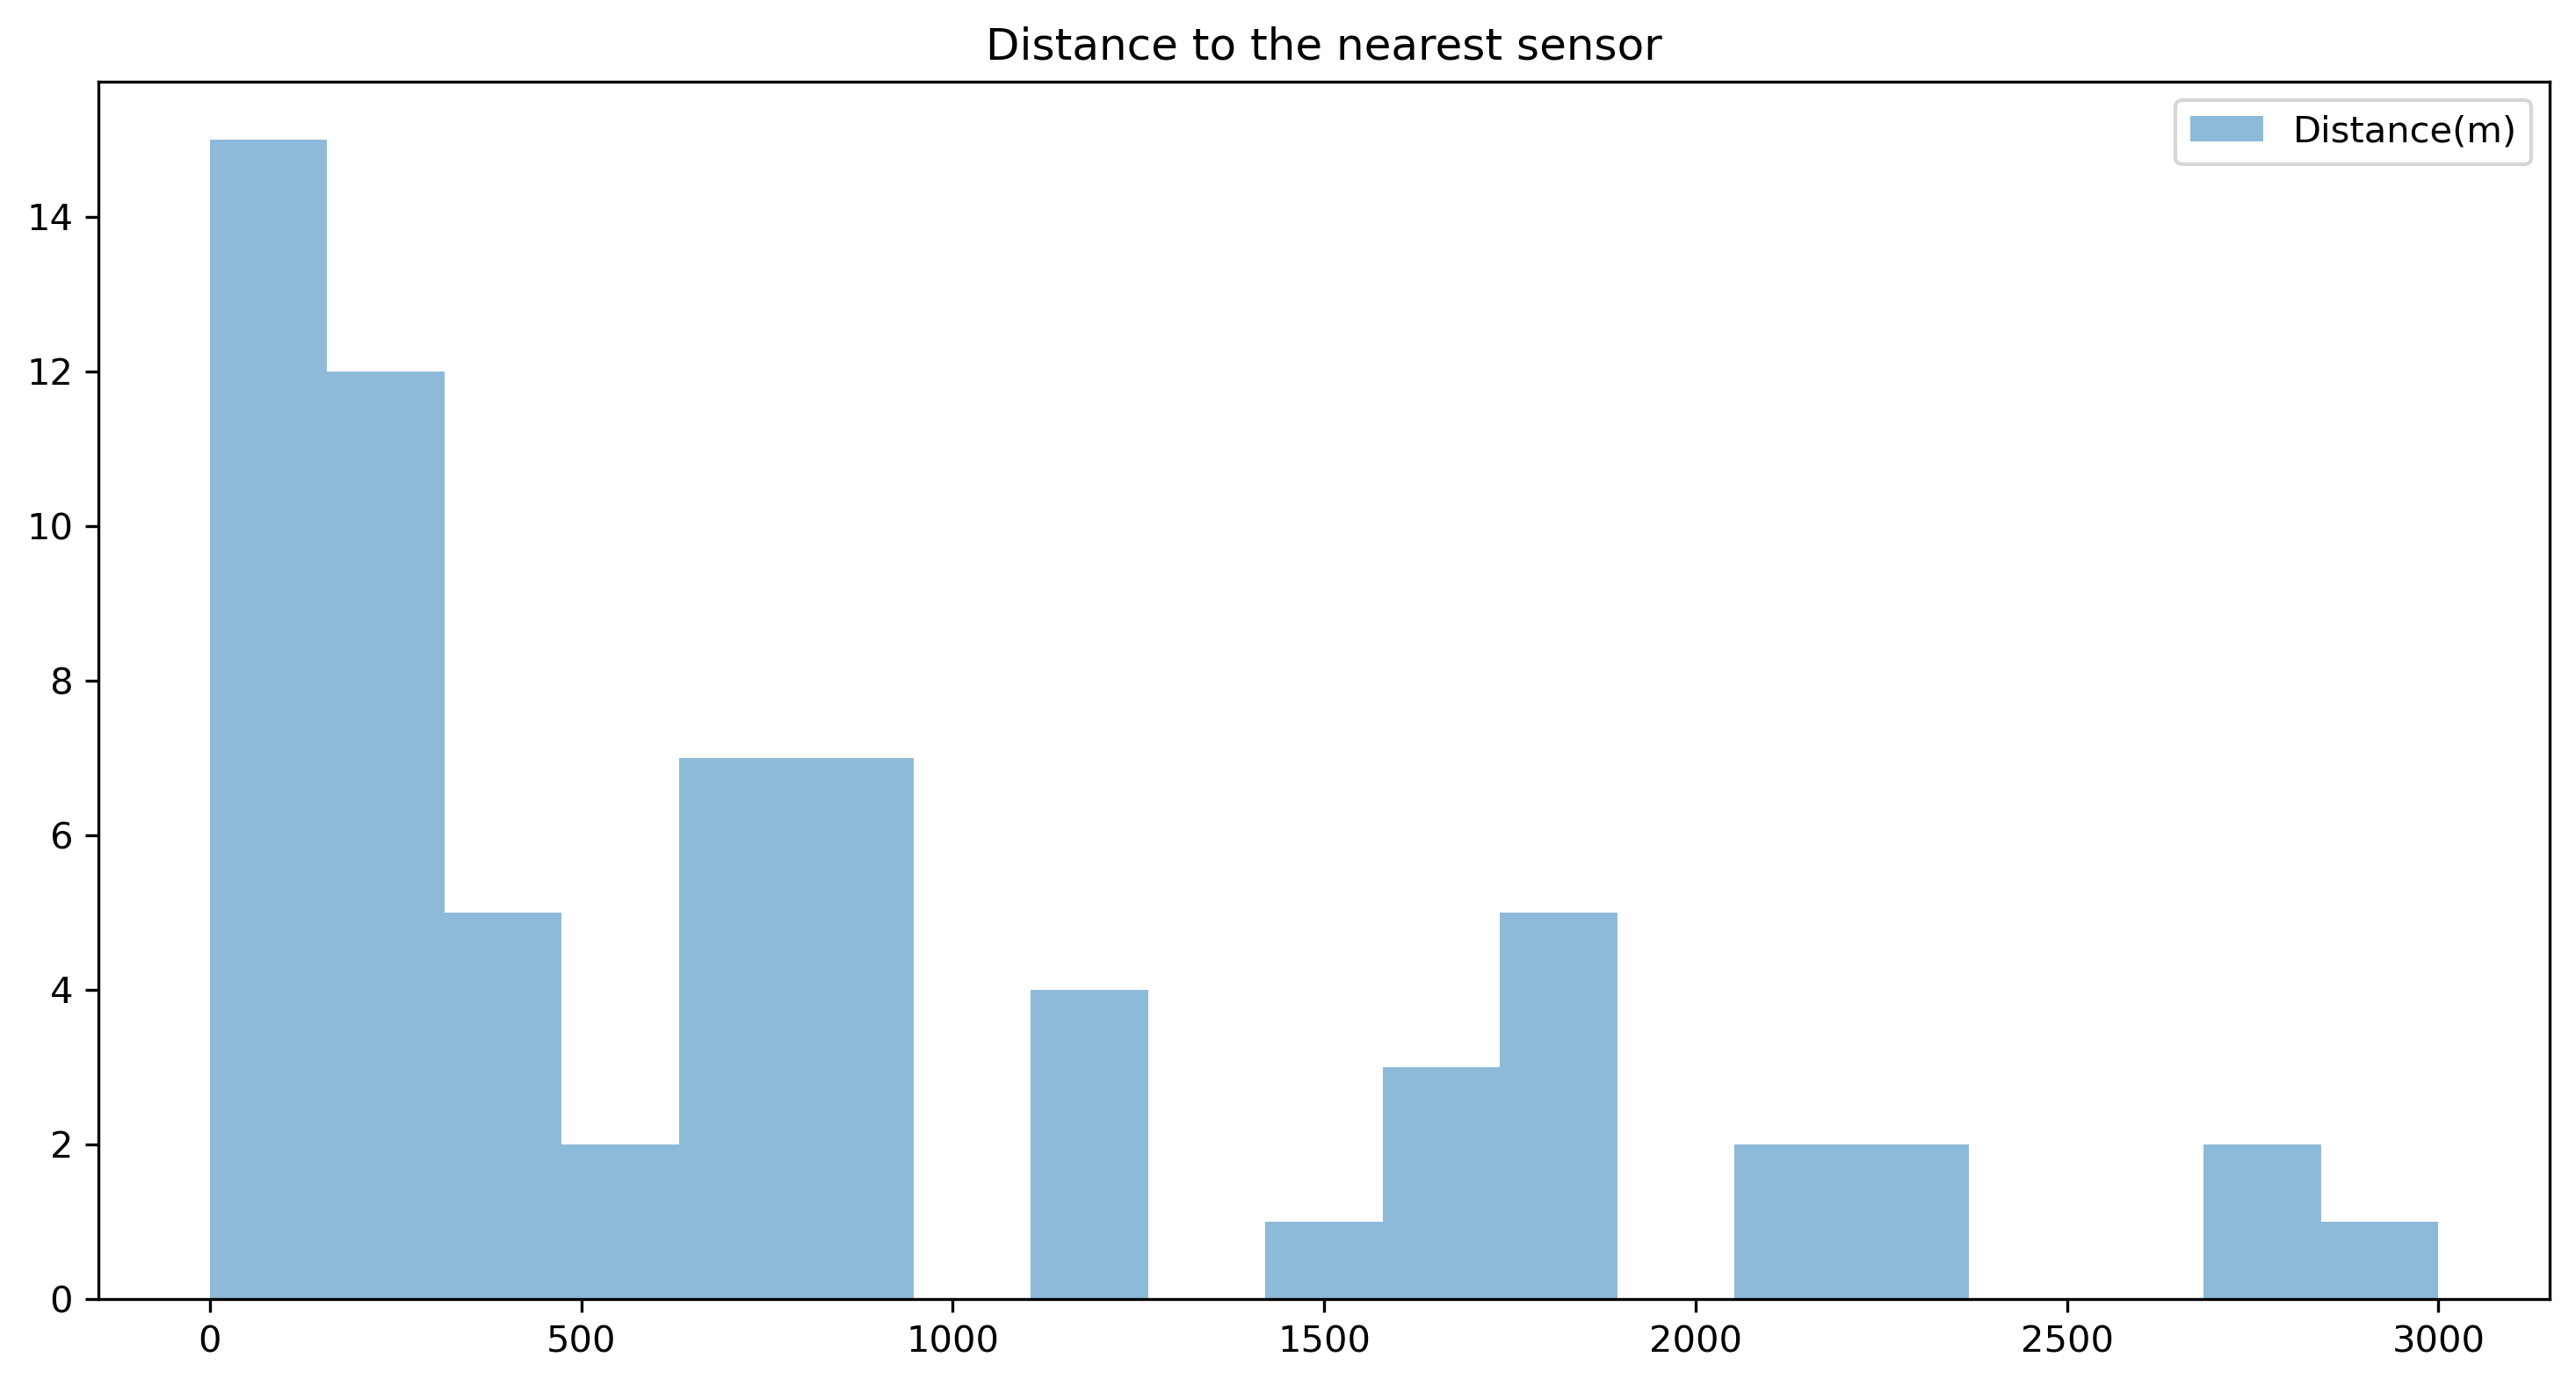

In [245]:
def make_hist_plot(X, lable, title, X_max, bin_num):
    figure(figsize=(12, 6), dpi=300)

    bins = np.linspace(0, X_max, bin_num)
    x = np.array(X.tolist())

    plt.hist(x, bins, alpha=0.5, label=lable)

    plt.legend(loc='upper right')
    plt.title(title)
    
    return plt.show()

make_hist_plot(countpoint_dis['distances'], 'Distance(m)', 'Distance to the nearest sensor', 3000, 20)

#### Create the buffer (200m) and get the intersection

In [207]:
countpoint_buffer = countpoint_68.copy()
countpoint_buffer.geometry = countpoint_buffer.geometry.buffer(200,6)

In [212]:
intersection = gpd.sjoin(countpoint_buffer, detector_470, how='left')
intersection = intersection.dropna().reset_index(drop=True)
intersection

,count_point_id,data_len,date,time,latitude,longitude,geometry,index_right,siteId,start_date,end_date,full_dates,practical_dates,consecutive_percentage,description,lat,lon,easting,northing,type
0,93216,12,['2022-05-11'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.850608,-4.268232,"POLYGON ((420800.675 6190180.143, 420793.860 6...",84.0,GB0151_C,2021-12-13,2023-09-30,657.0,627.0,0.954338,West Street northbound inside lane,55.850478,-4.265909,258242.083,664242.330,detector
1,93216,12,['2022-05-11'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.850608,-4.268232,"POLYGON ((420800.675 6190180.143, 420793.860 6...",441.0,GL0051_S,2021-12-13,2023-09-30,657.0,627.0,0.954338,Scotland Street westbound,55.849810,-4.268538,258075.081,664173.331,detector
2,93216,12,['2022-05-11'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.850608,-4.268232,"POLYGON ((420800.675 6190180.143, 420793.860 6...",442.0,GL0051_X,2021-12-13,2023-09-30,657.0,627.0,0.954338,Carnoustie Street southbound L/T into Scotland St,55.849993,-4.269779,257998.080,664196.332,detector
3,93216,12,['2022-05-11'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.850608,-4.268232,"POLYGON ((420800.675 6190180.143, 420793.860 6...",85.0,GB0151_E,2021-12-13,2023-09-30,657.0,627.0,0.954338,West Street northbound,55.850471,-4.265829,258247.083,664241.330,detector
4,80443,12,['2021-10-05'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.861945,-4.267167,"POLYGON ((420890.449 6191440.503, 420883.634 6...",8.0,GA058A_B,2021-12-13,2023-09-30,657.0,627.0,0.954338,Waterloo St Westbound inside to Pitt St,55.860773,-4.265182,258325.084,665386.348,detector
5,80443,12,['2021-10-05'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.861945,-4.267167,"POLYGON ((420890.449 6191440.503, 420883.634 6...",9.0,GA058A_C,2021-12-13,2023-09-30,657.0,627.0,0.954338,Waterloo St Westbound inside to Pitt St,55.860818,-4.265169,258326.084,665391.347,detector
6,80443,12,['2021-10-05'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.861945,-4.267167,"POLYGON ((420890.449 6191440.503, 420883.634 6...",11.0,GA0601_V,2021-12-13,2023-09-30,657.0,627.0,0.954338,Pitt St Northbound to Bothwell St,55.861022,-4.266299,258256.083,665416.349,detector
7,80443,12,['2021-10-05'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.861945,-4.267167,"POLYGON ((420890.449 6191440.503, 420883.634 6...",10.0,GA0601_T,2021-12-13,2023-09-30,657.0,627.0,0.954338,Pitt Street southbound to Bothwell St,55.862381,-4.265707,258298.084,665566.350,detector
8,80443,12,['2021-10-05'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.861945,-4.267167,"POLYGON ((420890.449 6191440.503, 420883.634 6...",4.0,GA0401_S,2021-12-13,2023-09-30,657.0,627.0,0.954338,St Vincent Street Westbound,55.862546,-4.266052,258277.083,665585.351,detector
9,80443,12,['2021-10-05'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.861945,-4.267167,"POLYGON ((420890.449 6191440.503, 420883.634 6...",12.0,GA0651_A,2021-12-13,2023-09-30,657.0,627.0,0.954338,St Vincent Street eastbound to Pitt St,55.862841,-4.268051,258153.082,665622.353,detector


#### Get the distance within buffer

In [220]:
intersection_dis = pd.merge(intersection[['count_point_id','siteId']], countpoint_68, how="inner", on=["count_point_id"])
intersection_dis = gpd.GeoDataFrame(intersection_dis, crs="epsg:32630")
intersection_dis["distance"] = intersection_dis.distance(detector_470.loc[intersection["index_right"]].reset_index(drop=True))
intersection_dis

,count_point_id,siteId,data_len,date,time,latitude,longitude,geometry,distance
0,93216,GB0151_C,12,['2022-05-11'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.850608,-4.268232,POINT (420600.675 6190180.143),146.196292
1,93216,GL0051_S,12,['2022-05-11'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.850608,-4.268232,POINT (420600.675 6190180.143),90.907180
2,93216,GL0051_X,12,['2022-05-11'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.850608,-4.268232,POINT (420600.675 6190180.143),118.560075
3,93216,GB0151_E,12,['2022-05-11'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.850608,-4.268232,POINT (420600.675 6190180.143),151.283695
4,80443,GA058A_B,12,['2021-10-05'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.861945,-4.267167,POINT (420690.449 6191440.503),180.108210
5,80443,GA058A_C,12,['2021-10-05'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.861945,-4.267167,POINT (420690.449 6191440.503),177.091346
6,80443,GA0601_V,12,['2021-10-05'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.861945,-4.267167,POINT (420690.449 6191440.503),116.145361
7,80443,GA0601_T,12,['2021-10-05'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.861945,-4.267167,POINT (420690.449 6191440.503),103.519310
8,80443,GA0401_S,12,['2021-10-05'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.861945,-4.267167,POINT (420690.449 6191440.503),96.682860
9,80443,GA0651_A,12,['2021-10-05'],"[7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]",55.861945,-4.267167,POINT (420690.449 6191440.503),114.134643


#### 18 countpoints 

In [230]:
countpoint_val_list = intersection_dis.count_point_id.unique()
countpoint_val = countpoint_68[countpoint_68.count_point_id.isin(countpoint_val_list)].reset_index(drop=True)

detector_val_list = intersection_dis.siteId.unique()
detector_val = detector_470[detector_470.siteId.isin(detector_val_list)].reset_index(drop=True)

In [233]:
m = countpoint_68.explore(color="Grey",name="Count Points",tiles='cartodbpositron')
detector_470.explore(m=m, color='Pink', name="Sensors")

countpoint_val.explore(m=m, color='Black', name="Count Points (200m)")
detector_val.explore(m=m, color='Red', name="Sensors (200m)")

folium.LayerControl().add_to(m)
m

### Calculate the correlation 

In [302]:
d1w1 = intersection_dis.loc[intersection_dis.data_len==48]
d1w1[['count_point_id', 'siteId', 'date']]

,count_point_id,siteId,date
49,40924,GC185A_S,"['2020-09-16', '2022-06-14']"
50,40924,GC185A_R,"['2020-09-16', '2022-06-14']"
51,40924,GC180A_A,"['2020-09-16', '2022-06-14']"
52,811478,GG0251_A,"['2020-09-17', '2022-09-08']"
53,811478,GG015A_B,"['2020-09-17', '2022-09-08']"
...,...,...,...
57,811253,GG2701_B,"['2019-10-10', '2020-10-08']"
58,811253,GG272A_S,"['2019-10-10', '2020-10-08']"
59,80446,GL0401_V,"['2020-09-02', '2022-10-07']"
60,80446,GL0401_R,"['2020-09-02', '2022-10-07']"


In [319]:
cp = raw_counts.loc[raw_counts.count_point_id==40924]
cp_dates = cp.loc[cp.count_date>'2019-09-30', 'count_date'].unique().tolist()
cp_time = cp.hour.unique().tolist()

cp_sensors = d1w1.loc[d1w1.count_point_id==40924,'siteId'].tolist()
for sensor in cp_sensors:
    sensor_df = pd.read_csv('SCOOT/data_470_hourly/'+ sensor + '.csv')
    

In [320]:
cp_sensors

['GC185A_S', 'GC185A_R', 'GC180A_A']

In [335]:
sensor = 'GC185A_S'
sensor_df = pd.read_csv('SCOOT/data_470_hourly/'+ sensor + '.csv')
sensor_df = sensor_df[sensor_df.date.isin(cp_dates)]
sensor_df = sensor_df[sensor_df.time.isin(cp_time)]
#only select oneway for countpoint
cp_df = cp[cp.count_date.isin(cp_dates)].loc[cp.direction_of_travel=='E'].sort_values(by=['count_date','hour'])
sensor_df['flow'].corr(cp_df['all_motor_vehicles'])

nan

In [327]:
sensor_df

,date,time,flow
7576,2020-09-16,7,107
7577,2020-09-16,8,116
7578,2020-09-16,9,86
7579,2020-09-16,10,104
7580,2020-09-16,11,152
...,...,...,...
22700,2022-06-14,14,156
22701,2022-06-14,15,113
22702,2022-06-14,16,94
22703,2022-06-14,17,100


In [334]:
cp_df[['count_date','hour','direction_of_travel','all_motor_vehicles']]
#.sort_values(by=['count_date','direction_of_travel','hour'])

,count_date,hour,direction_of_travel,all_motor_vehicles
17210,2020-09-16,7,E,2132
17211,2020-09-16,8,E,2258
17212,2020-09-16,9,E,1786
17213,2020-09-16,10,E,1498
17202,2020-09-16,11,E,1605
...,...,...,...,...
18019,2022-06-14,14,E,1799
18020,2022-06-14,15,E,1853
18021,2022-06-14,16,E,2026
18022,2022-06-14,17,E,1872


#### Make map

In [234]:
map_68 = countpoint_68.explore(column='data_len',cmap='coolwarm',legend=True,tooltip=['count_point_id','data_len'],tiles='cartodbpositron',width=750, height=500)
folium.TileLayer('cartodbdark_matter').add_to(map_68)
folium.LayerControl().add_to(map_68)

map_68

In [122]:
map_470 = detector_470.explore(column='full_dates',cmap='coolwarm',legend=True,tooltip=['siteId','full_dates'],tiles='cartodbpositron',width=750, height=500)
folium.TileLayer('cartodbdark_matter').add_to(map_470)
folium.LayerControl().add_to(map_470)

map_470